# Praca domowa 6 - Analiza PCA

### Wprowadzenie

Celem pracy domowej jest przeprowadzenie analizy PCA na zbiorze danych **heart.csv** dotyczącym obecności chorób serca u pacjentów.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart.csv')
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


Badany zbiór składa się z 462 obserwacji i 10 zmiennych. Jak widać powyżej, nie występują tutaj żadne braki danych. Wszystkie kolumny oprócz `famhist` są typu numerycznego.

In [19]:
df['famhist'].nunique()

2

Jako że kolumna `famhist` zawiera dwie unikalne wartości - Present i Absent, możemy je zamienić na odpowiednio 1 i 0, aby otrzymać kolumnę numerycznego typu, potrzebną do dalszych analiz.

In [20]:
df['famhist'].replace({'Present': 1, 'Absent': 0}, inplace=True)
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


### Korelacje między zmiennymi

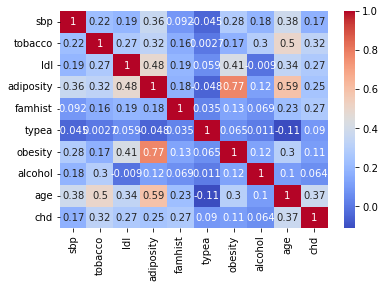

In [22]:
import seaborn as sns
corr = df.corr(method = 'spearman')
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

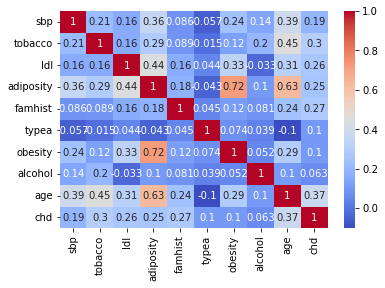

In [23]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

Pierwszy z wykresów przedstawia korelację Spearmana, zaś drugi Pearsona. Na podstawie obu z nich możemy stwierdzić, że najsilniej skorelowanymi zmiennymi są `adiposity` i `obesity`, co wydaje się być logiczne jako że obie z nich są wskaźnikami otyłości. Z drugiej strony zaobserwować możemy znacznie silniejsze skorelowanie zmiennej `age` z `adiposity` niż w przypadku `age` oraz `obesity`. Jest tak dlatego, że `adiposity` oznacza zawartość tłuszczu w ciele, która wzrasta wraz z wiekiem, zaś `obesity` to po prostu wskaźnik otyłości w odniesieniu do ogółu populacji.

## PCA
Kolejnym krokiem jest przeprowadzenie PCA (Principal Component Analysis). Zanim przejdziemy do analizy PCA usuniemy jeszcze zmienną celu - `chd`, ponieważ chcemy sprawdzić jedynie główne składowe wpływające na wynik, nie mając wiedzy o faktycznym wyniku.

In [24]:
target = df['chd']
df = df.drop(columns=['chd'])
df, df_test, target, target_test = train_test_split(df, target, test_size=0.2, random_state=32, stratify=target)

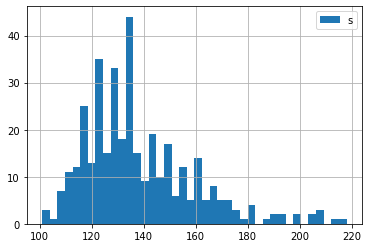

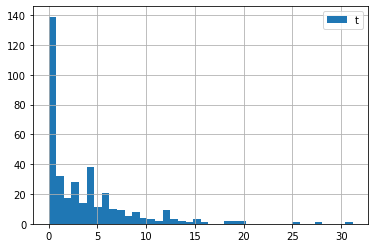

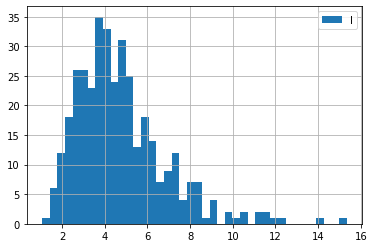

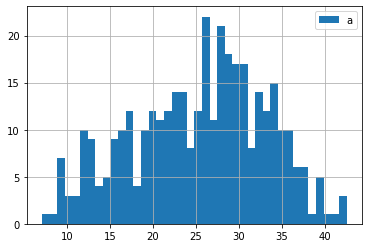

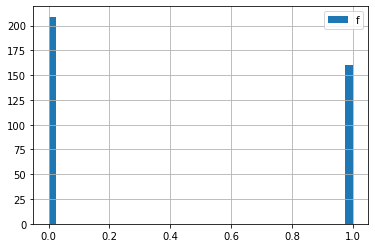

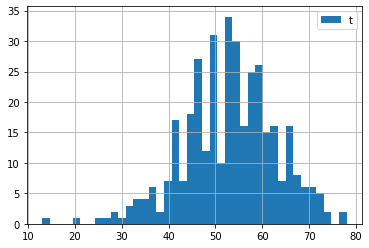

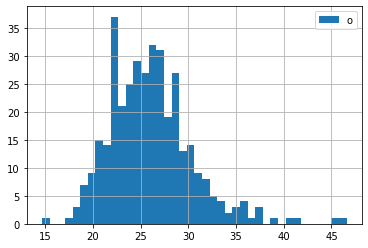

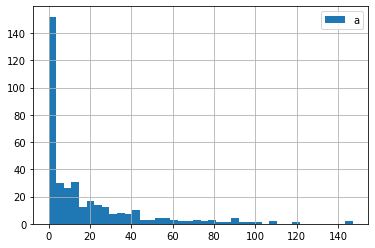

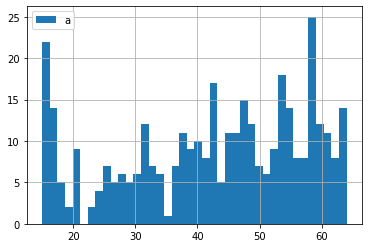

In [25]:
names = list(df.columns.values)
for name in names:
    df[name].hist(bins=40)
    plt.legend(labels = name)
    plt.show()

Nie wszystkie rozkłady przypominają normalne, więc użyjemy MinMax Scaler.

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled

array([[0.36752137, 0.07692308, 0.49509116, ..., 0.39774153, 0.09083498,
        0.91836735],
       [0.64102564, 0.19230769, 0.20406732, ..., 0.19981179, 0.02792309,
        0.93877551],
       [0.21367521, 0.00673077, 0.20196353, ..., 0.23431619, 0.01644133,
        0.04081633],
       ...,
       [0.17948718, 0.        , 0.18863955, ..., 0.30301129, 0.        ,
        0.30612245],
       [0.1965812 , 0.05769231, 0.18723703, ..., 0.23713927, 0.07126843,
        0.10204082],
       [0.26495726, 0.        , 0.15638149, ..., 0.32057716, 0.22155038,
        0.36734694]])

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 9, random_state = 101)
pca.fit(scaled)

PCA(n_components=9, random_state=101)

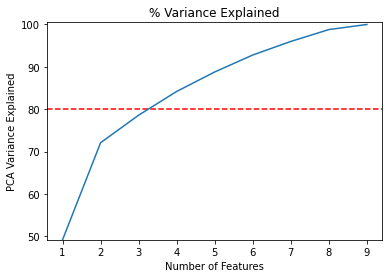

In [28]:
variance = pca.explained_variance_ratio_
x = np.arange(1, 10)
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('PCA Variance Explained')
plt.xlabel('Number of Features')
plt.title('% Variance Explained')
plt.ylim(min(var), 100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(x, var)
plt.show()

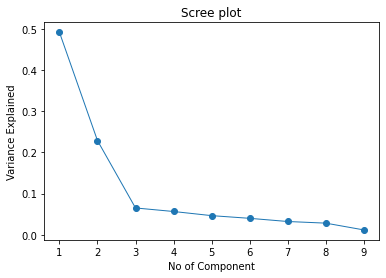

In [29]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth = 1)
plt.title('Scree plot')
plt.xlabel('No of Component')
plt.ylabel('Variance Explained')
plt.show()

Na podstawie powyższych wykresów zdecydowałyśmy się ustalić liczbę `n_components = 2` - ich większa liczba nie zwiększa zbytnio sumarycznej wyjaśnianej wariancji, poza tym wizualizacje dla zbyt dużej liczby komponentów nie będą czytelne. Widzimy, że 2 komponenty są w stanie wyjaśnić około 72% wariancji, co jest dobrym wynikiem.

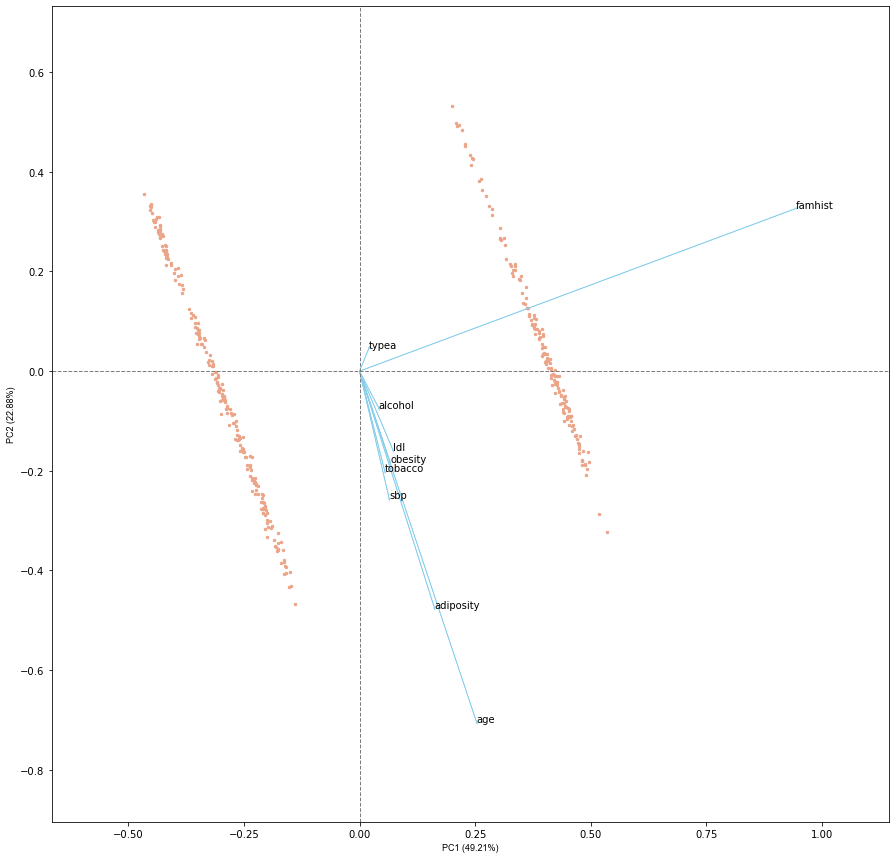

In [32]:
from bioinfokit.visuz import cluster
pca = PCA(n_components = 2, random_state = 101)
pca.fit(scaled)
pca_scores = pca.fit_transform(scaled)
cluster.biplot(cscore=pca_scores, loadings=pca.components_, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), 
               var2=round(pca.explained_variance_ratio_[1]*100, 2), show=True, dim=(15, 15))
plt.show()

Biplot łączy w sobie dwa wykresy - PCA score plot oraz loading plot. PCA plot (beżowy) pokazuje klastry obserwacji, stworzone na podstawie ich podobieństwa, za to loading plot (niebieski) pokazuje wpływ każdej ze zmiennych objaśniających na dany komponent. Przykładowo widzimy, że zmienna `famhist` ma większy wpływ na pierwszy komponent niż na drugi.

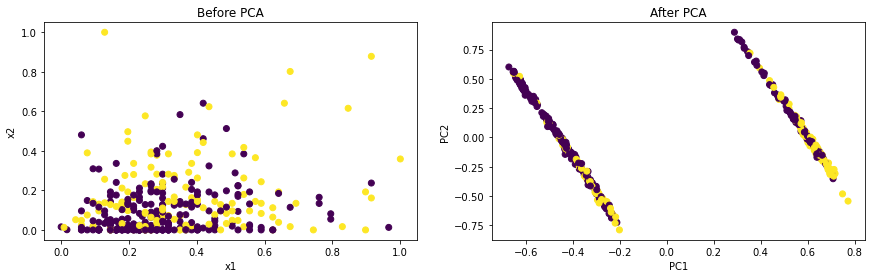

In [33]:
pca = PCA(n_components = 2, random_state = 101)
scaled_new = pca.fit_transform(scaled)
y = target
fig, axes = plt.subplots(1,2)
axes[0].scatter(scaled[:,0], scaled[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(scaled_new[:,0], scaled_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.subplots_adjust(left=0.1, 
                    right=2)
plt.show()

Powyżej przedstawiona jest wariancja przed oraz po PCA (na dwóch wymiarach). Podział punktów nie jest satysfakcjonujący, stąd można rozważyć użycie StandardScaler.